In [14]:
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D


---
# VIDEO: Projections in R^2
---


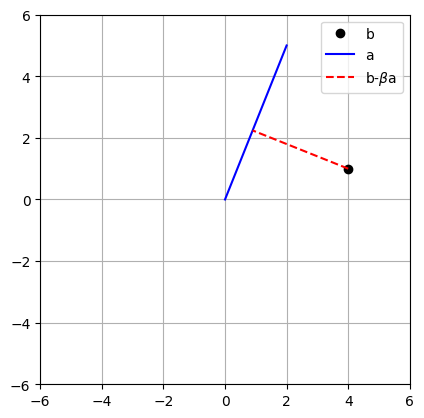

In [15]:

# point b
b = np.array([4,1])

# line a
a = np.array([ 2, 5 ])

# beta
beta = (a.T@b) / (a.T@a)

# draw!
plt.plot(b[0],b[1],'ko',label='b')
plt.plot([0, a[0]],[0, a[1]],'b',label='a')

# now plot projection line
plt.plot([b[0], beta*a[0]],[b[1], beta*a[1]],'r--',label=r'b-$\beta$a')
plt.axis('square')
plt.grid()
plt.legend()
plt.axis((-6, 6, -6, 6))

plt.show()


---
# VIDEO: Projections in R^N
---


In [16]:
## the goal here is to solve Ax=b for x

# sizes
m = 16
n = 10

# vector b
b = np.random.randn(m,1)

# matrix A
A = np.random.randn(m,n)

# solution using explicit inverse
x1 = np.linalg.inv(A.T@A) @ (A.T@b)

# python solution (better method)
x2 = np.linalg.solve(A.T@A,A.T@b)

# show that the results are the same
print(np.round(x1.T,3))
print(np.round(x2.T,3))

[[ 0.244  0.008  0.239  0.685 -0.276 -0.748  0.018 -0.23   0.318 -0.09 ]]
[[ 0.244  0.008  0.239  0.685 -0.276 -0.748  0.018 -0.23   0.318 -0.09 ]]


In [17]:
## geometric perspective in R^3

# matrix sizes
m = 3
n = 2

# vector b
b = np.random.randn(m,1)

# matrix A
A = np.random.randn(m,n)


# solution
x = np.linalg.solve(A.T@A,A.T@b)
Ax = A@x

print(b.T)
print(Ax.T)

[[0.86026423 1.36196325 0.18523434]]
[[ 0.63009848  0.78071464 -0.6867379 ]]


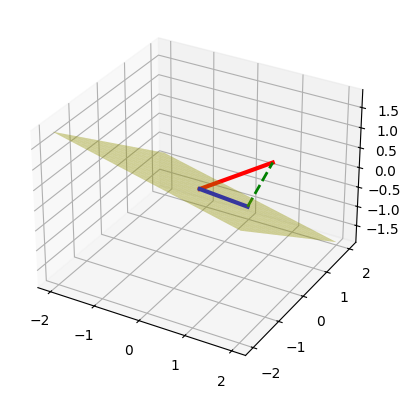

In [18]:
## plot
b_flat = b.flatten()
Ax_flat = Ax.flatten()

fig = plt.figure(figsize=plt.figaspect(1))
ax = fig.add_subplot(111, projection='3d')

# plot the vectors
ax.plot([0, b_flat[0]], [0, b_flat[1]], [0, b_flat[2]], 'r', linewidth=3, label='b')
ax.plot([0, Ax_flat[0]], [0, Ax_flat[1]], [0, Ax_flat[2]], 'b', linewidth=3, label='Ax (projection)')

# plot the projection line
ax.plot([Ax_flat[0], b_flat[0]],
        [Ax_flat[1], b_flat[1]],
        [Ax_flat[2], b_flat[2]], 'g--', linewidth=2, label='Error vector')

# now draw plane
xx, yy = np.meshgrid(np.linspace(-2, 2, 20), np.linspace(-2, 2, 20))
cp = np.cross(A[:, 0], A[:, 1])
z1 = (-cp[0] * xx - cp[1] * yy) / cp[2]
ax.plot_surface(xx, yy, z1, alpha=0.4, color='yellow', label='Column space')

plt.show()


---
# VIDEO: QR decomposition
---


In [19]:
# example from the slides

A = [ [1,0],
      [1,0],
      [0,1] ]
  
# "full" QR decomposition
Q,R = np.linalg.qr(A,'complete')
print(Q), print(' ')

# "economy" QR decomposition
Q,R = np.linalg.qr(A) # is the default option in Python
print(Q)

[[-0.70710678  0.          0.70710678]
 [-0.70710678  0.         -0.70710678]
 [-0.         -1.          0.        ]]
 
[[-0.70710678  0.        ]
 [-0.70710678  0.        ]
 [-0.         -1.        ]]


In [20]:
## another example

# the to-be-decomposed matrix
M = np.array( [ [1, 1,-2], [3,-1, 1] ] )

# QR decomposition
Q,R = np.linalg.qr(M,'complete')

# notice:
print('R from QR: '),print(np.round(R,4))
print('R from Q^TM: '),print(np.round(Q.T@M,4))

R from QR: 
[[-3.1623  0.6325 -0.3162]
 [ 0.     -1.2649  2.2136]]
R from Q^TM: 
[[-3.1623  0.6325 -0.3162]
 [ 0.     -1.2649  2.2136]]


(None, None)

[]

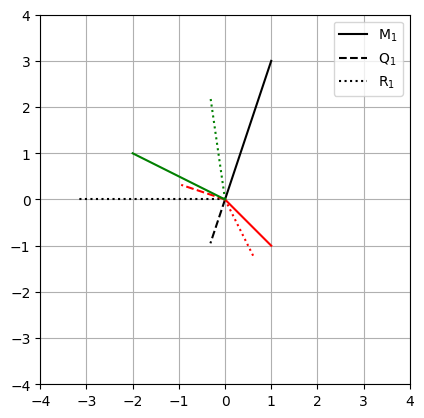

In [21]:
# plot
colorz = 'krg'

for i in range(0,np.shape(M)[1]):
    
    # plot original vector M
    plt.plot([0,M[0,i]],[0,M[1,i]],colorz[i])
    
    # plot orthogonalized vector Q
    if i<np.shape(Q)[1]:
        plt.plot([0,Q[0,i]],[0,Q[1,i]],colorz[i],linestyle='--')
    
    # plot residual vector R
    plt.plot([0,R[0,i]],[0,R[1,i]],colorz[i],linestyle=':')

    
plt.legend(['M$_1$','Q$_1$','R$_1$'])
plt.axis('square')
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.grid(True)
plt.plot()